#  HW 04 Worked Problems

Purpose: For the customers of an online motorcycle clothing company, build a predictive model of Weight from a variety of body measurements plus Gender.

The data are actual body measurements of customers for a motorcycle online clothing retailer.

Data: http://web.pdx.edu/~gerbing/data/BodyMeas2500.xlsx


## Preliminaries

Date of analysis

In [64]:
from datetime import datetime as dt
now = dt.now()
print("Analysis on", now.strftime("%Y-%m-%d"), "at", now.strftime("%H:%M %p"))

Analysis on 2023-07-20 at 09:11 AM


Establish current working directory

In [65]:
import os
os.getcwd()

'/Users/chasecarlson/Documents/GSCM Course Materials/GSCM 575 Machine Learning in Business/Python Pjojects/GSCM-575-ML/code'

Import libraries

In [66]:
import pandas as pd
import numpy as np
import seaborn as sns

Import LinearRegression from sklearn and instantiate as reg_model

In [67]:
from sklearn.linear_model import LinearRegression
reg_model = LinearRegression()

## 1. Data Exploration and Preparation

#### *a. Read the data.*

In [68]:
df = pd.read_excel('http://web.pdx.edu/~gerbing/data/BodyMeas2500.xlsx')

#### *b. How many samples (rows of data) and columns are there in the data file?*

There are 2500 rows and 7 columns.

In [69]:
df.shape

(2500, 7)

#### *c. Display the first 5 rows of data and the variable names.*

In [70]:
df.head()

,Gender,Weight,Height,Waist,Hips,Chest,ArmLength
0,M,135,70,34,38,36,34
1,M,235,66,36,45,48,32
2,M,205,72,38,44,44,36
3,M,190,70,36,41,40,32
4,F,200,64,39,47,45,32


#### *d. Check for missing data. Any action (deletion, imputation) needed?*

In [71]:
print(df.isna().sum())
print('Total missing: ', df.isna().sum().sum())

Gender       0
Weight       0
Height       0
Waist        0
Hips         0
Chest        0
ArmLength    0
dtype: int64
Total missing:  0


#### *e. Generate a frequency distribution table of Gender.*

In [72]:
df.Gender.value_counts()

M    1908
F     592
Name: Gender, dtype: int64

#### *f. Generate a bar chart of Gender.*

<Axes: xlabel='Gender', ylabel='count'>

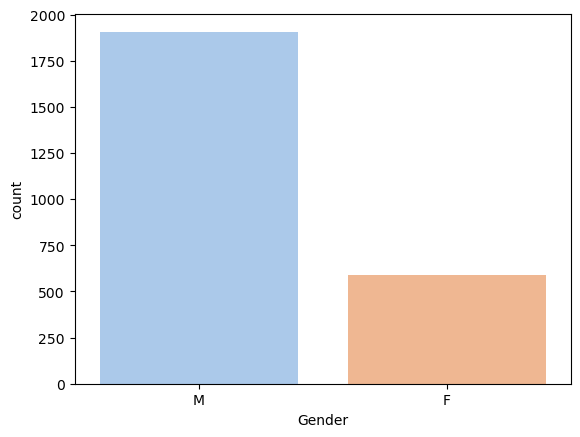

In [73]:
sns.countplot(df, x = 'Gender', palette='pastel')

#### *g. Convert the two levels of Gender to two dummy variables and use one of them in the following regression analysis.*

In [74]:
df = pd.get_dummies(df, columns=['Gender'])
df.head()

,Weight,Height,Waist,Hips,Chest,ArmLength,Gender_F,Gender_M
0,135,70,34,38,36,34,0,1
1,235,66,36,45,48,32,0,1
2,205,72,38,44,44,36,0,1
3,190,70,36,41,40,32,0,1
4,200,64,39,47,45,32,1,0


## 2. Regression Analysis 

#### *a. Store the features, the predictor variables, in data structure X. Store the target variable in data structure y.*

In [75]:
pred_vars = ['Height', 'Waist', 'Hips', 'Chest', 'ArmLength', 'Gender_M']
X = df[pred_vars]
y = df['Weight']

#### *b. Use code to display the number of features.*

In [76]:
n_pred = len(pred_vars)
print("Number of predictor variables: ", n_pred)

Number of predictor variables:  6


#### *c.	Split the data into 75% training data and 25% testing data.*

In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=.25, 
                                                    random_state=1)

Confirm it worked by viewing the shape of the test & train data structures.

In [78]:
print("Shape of X data structures: ", X_train.shape, X_test.shape)
print("Shape of y data structures: ", y_train.shape, y_test.shape)

Shape of X data structures:  (1875, 6) (625, 6)
Shape of y data structures:  (1875,) (625,)


#### *d.	Do the multiple regression with all possible features. Display the estimated model coefficients.*

In [79]:
reg_model.fit(X_train, y_train)

LinearRegression()

In [80]:
print('intercept: %3f' % (reg_model.intercept_), '\n')

cdf = pd.DataFrame(reg_model.coef_, X.columns, columns=['Coefficients'])
print(cdf)

intercept: -331.629500 

           Coefficients
Height         2.802635
Waist          1.923748
Hips           2.137972
Chest          3.353648
ArmLength      0.359313
Gender_M       6.508491


#### *e. For the person who provided the first row of data, manually calculate his fitted weight from the model explicitly from the model coefficients. (For pedagogy, to show understanding of the model, not normally done here.)*

In [81]:
X.head()

,Height,Waist,Hips,Chest,ArmLength,Gender_M
0,70,34,38,36,34,1
1,66,36,45,48,32,1
2,72,38,44,44,36,1
3,70,36,41,40,32,1
4,64,39,47,45,32,0


Assign feature values and coefficients to variables to use in multiple regression equation:

In [82]:
intercept = reg_model.intercept_

b_height = X.loc[0, 'Height']
x_height = cdf.loc['Height', 'Coefficients']
b_waist = X.loc[0, 'Waist']
x_waist = cdf.loc['Waist', 'Coefficients']
b_hips = X.loc[0, 'Hips']
x_hips = cdf.loc['Hips', 'Coefficients']
b_chest = X.loc[0, 'Chest']
x_chest = cdf.loc['Chest', 'Coefficients']
b_arm = X.loc[0, 'ArmLength']
x_arm = cdf.loc['ArmLength', 'Coefficients']
b_gender = X.loc[0, 'Gender_M']
x_gender = cdf.loc['Gender_M', 'Coefficients']


Apply to multiple regression formula:

In [83]:
fitted_weight = intercept + (b_height * x_height) + (b_waist * x_waist) + (b_hips * x_hips) + (b_chest * x_chest) + (b_arm * x_arm) + (b_gender * x_gender)
print("Predicted weight for first row: ", fitted_weight)

Predicted weight for first row:  150.66179903202556


OR insert values manually:

In [84]:
fitted_weight2 = -331.629500 + (2.802635 * 70) + (1.923748 * 34) + (2.137972 * 38) + (3.353648 * 36) + (0.359313 * 34) + (6.508491 * 1)
print("The fitted weight of the person in the first row is: ", fitted_weight2, "lbs")

The fitted weight of the person in the first row is:  150.661779 lbs


#### *f. What is the residual for the first person? Comment.*

In [85]:
e = df.loc[0, 'Weight'] - fitted_weight2
e

-15.661778999999996

The residual for the person in the first row is -15.661778999999996. This means that the predicted value was approximately -15.66 pounds different than the actual weight of the person in the first row.

#### *g.	Compute the forecasted values of y, $\hat y$, from the testing data for X.*

In [86]:
y_fit = reg_model.predict(X_train)
y_pred = reg_model.predict(X_test)

print(pd.DataFrame(reg_model.predict(X_train)))
print(pd.DataFrame(reg_model.predict(X_test)))

               0
0     154.798121
1     176.475776
2     180.721586
3     108.955845
4     112.281111
...          ...
1870  140.137094
1871  177.299138
1872  214.034495
1873  172.652367
1874  206.913923

[1875 rows x 1 columns]
              0
0    138.684670
1    183.317607
2    249.451167
3    224.727100
4    157.158072
..          ...
620  207.691352
621  138.067944
622  123.468895
623  157.728408
624  311.558153

[625 rows x 1 columns]


#### *h. Visually compare the forecasted values of y from the model applied to the testing data to the obtained values of y in the testing data. Comment*

[Text(0.5, 0, 'y from testing data'), Text(0, 0.5, 'predicted value of y')]

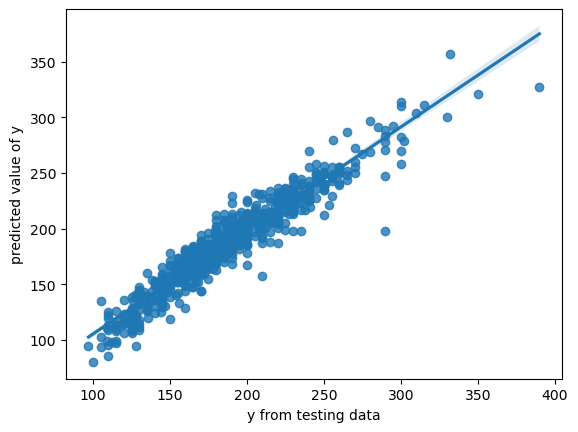

In [87]:
ax = sns.regplot(x=y_test, y=y_pred)
ax.set(xlabel='y from testing data', ylabel='predicted value of y')

#### *i.	Evaluate model fit to the training data with the standard deviation of residuals and R-squared. Comment*

The R-squared value for the test data is very high, at 0.887, which means that the model is a good fit for the test data with the applied variables, however, we'll need to see the performance against the test data to determine whether the model is a good fit for the overall data set or not.

In [88]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_train, y_fit)
rsq = r2_score(y_train, y_fit)
print("MSE: %.3f" % mse)
se = np.sqrt(mse)
range95 = 4 * se
print("Stdev of residuals: %.3f " % se)
print("R-squared: %.3f" % rsq)


MSE: 224.515
Stdev of residuals: 14.984 
R-squared: 0.887


#### *j.	Evaluate model fit to the testing data with the standard deviation of residuals and R-squared. Comment**

The standard deviation of the residuals drops from 14.984 to 13.326, and R-squared improved from 0.887 to 0.909 when the model applied to the test data. This validates that the model is still a good fit.

In [89]:
mse_f = mean_squared_error(y_test, y_pred)
rsq_f = r2_score(y_test, y_pred)
print('Forecasting Mean squared error: %.3f' % mse_f)
print('Forecasting Standard deviation of residuals: %.3f' % np.sqrt(mse_f))
print('Forecasting R-squared: %.3f' % rsq_f)

Forecasting Mean squared error: 177.588
Forecasting Standard deviation of residuals: 13.326
Forecasting R-squared: 0.909


#### *k.	Is the model overfit?*

The model is not overfit because it improved when applied to the testing data. 

#### *l.	Cross-validate the data with five randomly selected folds, and evaluate with the average value of the standard deviation of residuals and R-squared across the folds.*

Import KFold from sklearn.model_selection and split the data into 5 folds

In [90]:
from sklearn.model_selection import KFold, cross_validate
# instantiate the KFold model with 5 splits, shuffle the data prior to split, and set the seed to recover same set in future.
kf = KFold(n_splits=5, shuffle=True, random_state=1) 

Calculate scores for each fold

In [91]:
scores = cross_validate(reg_model, X, y, cv=kf,
                        scoring=('r2', 'neg_mean_squared_error'),
                        return_train_score=True)

Convert scores to data frame

In [92]:
ds = pd.DataFrame(scores)
ds.head()

,fit_time,score_time,test_r2,train_r2,test_neg_mean_squared_error,train_neg_mean_squared_error
0,0.002344,0.000830,0.899467,0.890679,-183.506873,-220.196742
1,0.000936,0.000483,0.904874,0.889601,-174.515332,-222.249204
2,0.000822,0.000456,0.830941,0.909158,-359.182597,-176.276181
3,0.000805,0.000455,0.905171,0.889231,-184.512008,-219.900832
4,0.000798,0.000444,0.920204,0.884657,-171.481808,-223.071235


Rename MSE columns and convert to positive values: 

In [93]:
ds.rename(columns = {'test_neg_mean_squared_error': 'test_MSE', 
                     'train_neg_mean_squared_error': 'train_MSE'},
                     inplace=True)

ds['test_MSE'] = -ds['test_MSE']
ds['train_MSE'] = -ds['train_MSE']

print(ds.round(4))

   fit_time  score_time  test_r2  train_r2  test_MSE  train_MSE
0    0.0023      0.0008   0.8995    0.8907  183.5069   220.1967
1    0.0009      0.0005   0.9049    0.8896  174.5153   222.2492
2    0.0008      0.0005   0.8309    0.9092  359.1826   176.2762
3    0.0008      0.0005   0.9052    0.8892  184.5120   219.9008
4    0.0008      0.0004   0.9202    0.8847  171.4818   223.0712


Calculate average R-squared value and standard deviation across all 5 folds

In [94]:
print('Mean of test R-squared scores: %.3f' % ds['test_r2'].mean())
print('Mean of test MSE scores: %.3f' % ds['test_MSE'].mean())
se = np.sqrt(ds['test_MSE'].mean())
print('Standard deviation of mean test MSE scores: %.3f' % se)

Mean of test R-squared scores: 0.892
Mean of test MSE scores: 214.640
Standard deviation of mean test MSE scores: 14.651


## 3. Feature Selection

Can we obtain the same level of forecasting accuracy with a smaller set of features?

#### *a.	Show uniqueness and relevance of each feature in a single table that consists of VIFs and target correlations. Comment.*

In [95]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Predictor'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i)
for i in range(X.shape[1])]
cr = df.corr()['Weight'].round(3)
vif['Relevance'] = [cr[i]
for i in range(X.shape[1])]
vif

,Predictor,VIF,Relevance
0,Height,419.131300,1.000
1,Waist,216.931126,0.622
2,Hips,331.700435,0.861
3,Chest,295.719089,0.782
4,ArmLength,394.445013,0.876
5,Gender_M,6.261650,0.593


VIF factors are high for all variables except for gender. 

#### *b. Run the multivariate feature selection algorithm to retain the top three features.*

In [96]:
from sklearn.linear_model import LinearRegression
estimator = LinearRegression()
from sklearn.feature_selection import RFE
selector = RFE(estimator, n_features_to_select=3, step=1).fit(X,y)

In [97]:
print(selector.support_)
print(selector.ranking_)

[False False  True  True False  True]
[2 3 1 1 4 1]


#### *c. Subset a new data frame of the feature variables that contains just these three predictors. Call it X2. Show the first several rows of data.*

In [98]:
X2 = X.iloc[:, selector.support_]
X2.head()

,Hips,Chest,Gender_M
0,38,36,1
1,45,48,1
2,44,44,1
3,41,40,1
4,47,45,0


#### *d. Now fit this reduced model to all the data, X2 and $y$. Then generate the predicted scores into a data structure named y_fit2.*

Reestablish 'Weight' column as our target variable, y and assign the three predictor variables to X2.

In [99]:
y = df['Weight']
pred_vars2 = ['Hips', 'Chest', 'Gender_M']
X2 = df[pred_vars2]

Use train_test_split to split the data into X2_train, X2_test, y_train, & y_test. Hold 25% of the data for testing.

In [100]:
from sklearn.model_selection import train_test_split
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, 
                                                    test_size=.25, 
                                                    random_state=1)

Check that the data was split correctly:

In [101]:
print('Shape of X2 data structure: ', X2_train.shape, X2_test.shape)
print('Shape of y data structure: ', y_train.shape, y_test.shape)

Shape of X2 data structure:  (1875, 3) (625, 3)
Shape of y data structure:  (1875,) (625,)


Apply the fit() function for linear regression with the new X2_train data.

In [102]:
reg_model.fit(X2_train, y_train)

LinearRegression()

Check the coefficients with the new predictor variables:

In [103]:
print("intercept: %.3f" % (reg_model.intercept_), "\n")
cdf = pd.DataFrame(reg_model.coef_, X2.columns, columns=['Coefficients'])
print(cdf)

intercept: -181.277 

          Coefficients
Hips          3.496986
Chest         4.706229
Gender_M     25.040465


Put coefficients from 'before' and 'after' feature selection into its own data frame for comparison:

In [117]:
pd.DataFrame({'Feature': ['Hips', 'Chest', 'Gender_M'], 'Before': [2.137972, 3.353648, 6.508491], 'After': [3.496986, 4.706229, 25.040465]})

,Feature,Before,After
0,Hips,2.137972,3.496986
1,Chest,3.353648,4.706229
2,Gender_M,6.508491,25.040465


Coefficients increased for each variable, particularly Gender_M which increased from 6.5 to 25.04. 

##### Generate forecasts

In [121]:
y_fit2 = reg_model.predict(X2_train)
y_pred2 = reg_model.predict(X2_test)

#### *e. Did fit suffer from reducing the number of features from 5 to 3? Comment.*

Run the fit metrics using y_fit2 to determine how fit was impacted by removing predictor variables:

Stdev of residuals increased from 14.984 to 18.108, and R-squared reduced from 0.887 to 0.835, suggesting slightly poorer fit with the new features.

In [106]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_train, y_fit2)
rsq = r2_score(y_train, y_fit2)
print("MSE: %.3f" % mse)
se = np.sqrt(mse)
print("Stdev of residuals: %.3f " % se)
print("R-squared: %.3f" % rsq)

MSE: 327.882
Stdev of residuals: 18.108 
R-squared: 0.835


In [107]:
mse_f = mean_squared_error(y_test, y_pred2)
rsq_f = r2_score(y_test, y_pred2)
print('Forecasting Mean squared error: %.3f' % mse_f)
print('Forecasting Standard deviation of residuals: %.3f' % np.sqrt(mse_f))
print('Forecasting R-squared: %.3f' % rsq_f)

Forecasting Mean squared error: 281.996
Forecasting Standard deviation of residuals: 16.793
Forecasting R-squared: 0.855


In [108]:
vif = pd.DataFrame()
vif['Predictor'] = X2.columns
vif['VIF'] = [variance_inflation_factor(X2.values, i)
for i in range(X2.shape[1])]
cr = df.corr()['Weight'].round(3)
vif['Relevance'] = [cr[i]
for i in range(X2.shape[1])]
vif

,Predictor,VIF,Relevance
0,Hips,192.682979,1.000
1,Chest,213.759829,0.622
2,Gender_M,5.277822,0.861
